In [38]:
import pandas
import matplotlib.pyplot as plt
from numpy import arange, random
from cellshift import CS

random.seed(25)
X = arange(1, 101)
Y_base = 0.25 * X + 20
noise = random.uniform(-5, 5, size=len(X))
Y = Y_base + noise
df = pandas.DataFrame({'X': X, 'Y': Y})
d = CS(df)
d.data.limit(6).show()
# d.add_gaussian_noise_column("Y")
d.add_impulse_noise_column("Y", "noise_Y", sample_pct=10, impulse_pct=20)
d.data.limit(6).show()


┌───────┬────────────────────┐
│   X   │         Y          │
│ int64 │       double       │
├───────┼────────────────────┤
│     1 │ 23.951241366272118 │
│     2 │ 21.322769286725595 │
│     3 │  18.53838940701069 │
│     4 │ 17.859112320901794 │
│     5 │ 20.361001279251134 │
│     6 │ 17.673755471347157 │
└───────┴────────────────────┘

┌───────┬────────────────────┬────────────────────┐
│   X   │         Y          │      noise_Y       │
│ int64 │       double       │       double       │
├───────┼────────────────────┼────────────────────┤
│     1 │ 23.951241366272118 │ 23.951241366272118 │
│     2 │ 21.322769286725595 │ 21.322769286725595 │
│     3 │  18.53838940701069 │  18.53838940701069 │
│     4 │ 17.859112320901794 │ 17.859112320901794 │
│     5 │ 20.361001279251134 │    13.559059692105 │
│     6 │ 17.673755471347157 │ 17.673755471347157 │
└───────┴────────────────────┴────────────────────┘



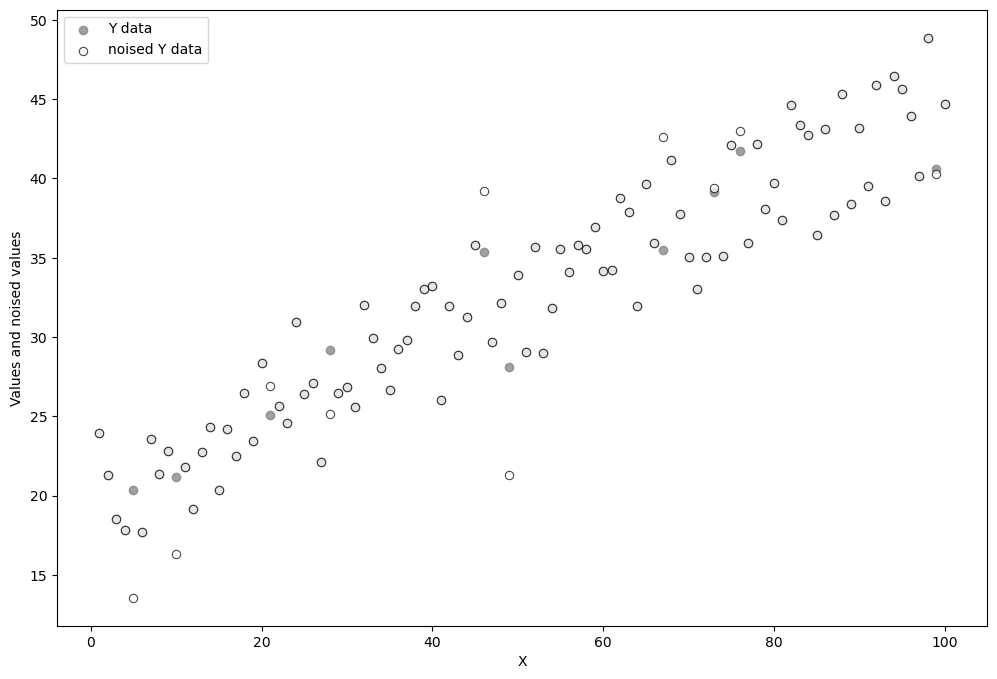

In [39]:
df = d.to_pandas()
plt.figure(figsize=(12,8))
plt.scatter(df.X, df.Y, color='gray', alpha=0.75, label="Y data")
plt.scatter(df.X, df.noise_Y, color='white', linewidths=0.75, edgecolor='black', alpha=0.75, label='noised Y data')
plt.xlabel('X')
plt.ylabel('Values and noised values')
plt.legend()
plt.show()

In [40]:
d.sql("""SELECT
         AVG(Y) AS Y_AVG, STDDEV(Y) AS Y_STD,
         AVG(noise_Y) AS NOISE_Y_AVG, STDDEV(noise_Y) AS NOISE_Y_STD
      FROM TABLE""", in_place=False).show()

┌────────────────────┬───────────────────┬──────────────────┬───────────────────┐
│       Y_AVG        │       Y_STD       │   NOISE_Y_AVG    │    NOISE_Y_STD    │
│       double       │      double       │      double      │      double       │
├────────────────────┼───────────────────┼──────────────────┼───────────────────┤
│ 32.531944959913844 │ 7.714547379941946 │ 32.4468895640333 │ 8.112523038902077 │
└────────────────────┴───────────────────┴──────────────────┴───────────────────┘

